[![ebac_logo-data_science.png](https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png)](https://github.com/earapanos/DataScienceExcercises/tree/main)
<!-- <img src="https://raw.githubusercontent.com/earapanos/DataScienceExcercises/refs/heads/main/ebac_logo-data_science.png" alt="ebac_logo-data_science"> -->

---

<!-- # **Profissão: Cientista de Dados** -->
### **Módulo 12** | Regressão I | Exercício 20

**Aluno:** [Eduardo Adriani Rapanos](https://www.linkedin.com/in/eduardo-rapanos/)<br>
**Data:** 06 de junho de 2025.

---

# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
from seaborn import load_dataset
%matplotlib inline
plt.rc('figure', figsize=(6, 4))

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


<Axes: xlabel='net_bill', ylabel='tip'>

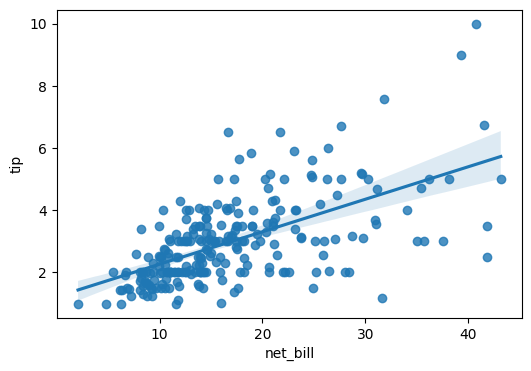

In [3]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])


In [4]:
# Regressão linear de 'tip_pct' explicada por 'net_bill'
regression_model_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Exibir o resumo da regressão
print(regression_model_pct.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.52e-06
Time:                        21:10:39   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

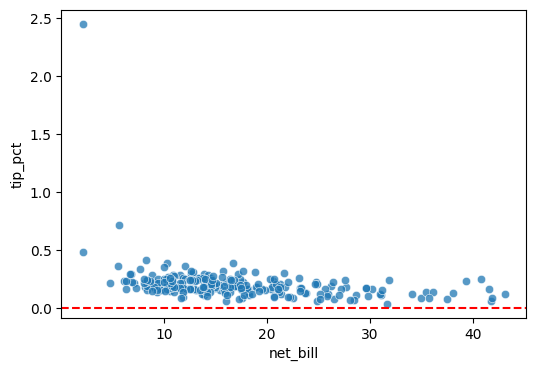

In [7]:
sns.scatterplot(x = 'net_bill', y = 'tip_pct', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.06
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.69e-13
Time:                        21:36:07   Log-Likelihood:                 123.77
No. Observations:                 244   AIC:                            -243.5
Df Residuals:                     242   BIC:                            -236.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

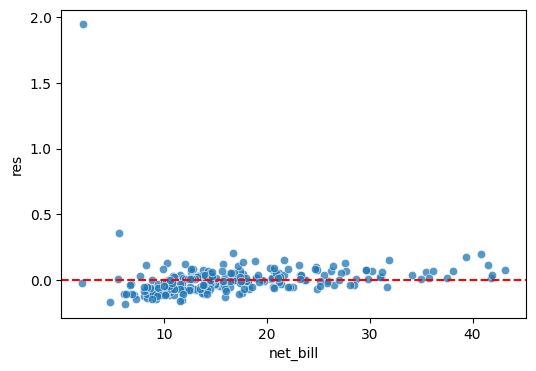

In [16]:
reg = smf.ols('tip_pct ~ np.log(net_bill+.01)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

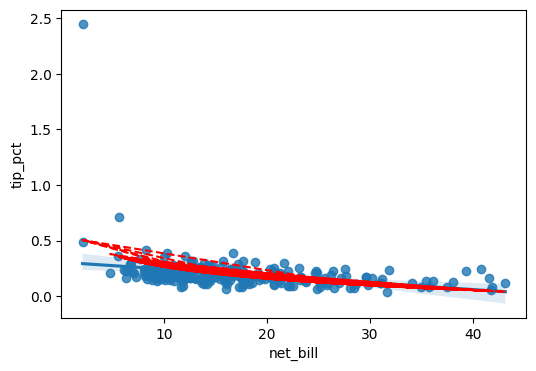

In [17]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     13.48
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           0.000297
Time:                        21:37:32   Log-Likelihood:                 102.94
No. Observations:                 244   AIC:                            -201.9
Df Residuals:                     242   BIC:                            -194.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.23

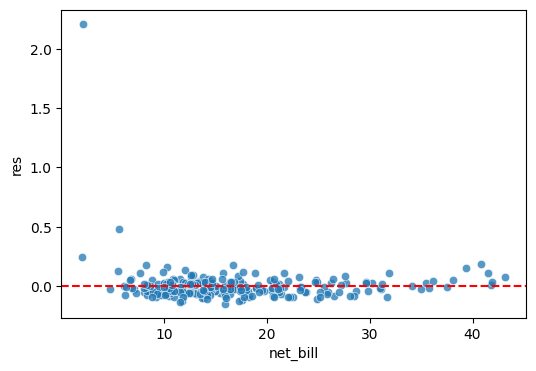

In [18]:
reg = smf.ols('tip_pct ~ np.power(net_bill,2)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

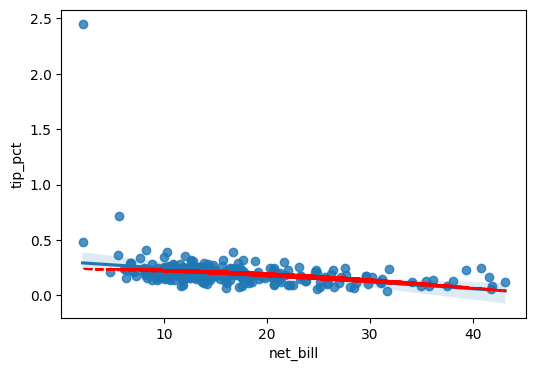

In [19]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.06
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           1.69e-13
Time:                        21:38:53   Log-Likelihood:                 123.77
No. Observations:                 244   AIC:                            -243.5
Df Residuals:                     242   BIC:                            -236.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

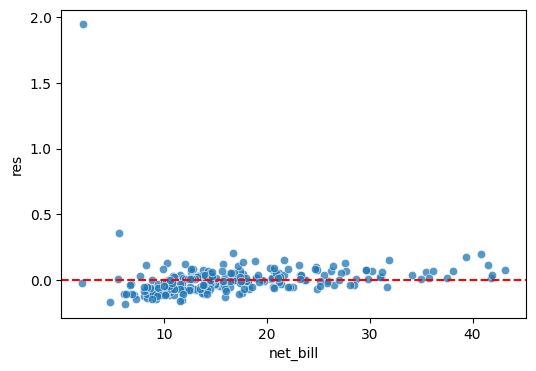

In [21]:
reg = smf.ols('tip_pct ~ np.log(net_bill+.01)', data = tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

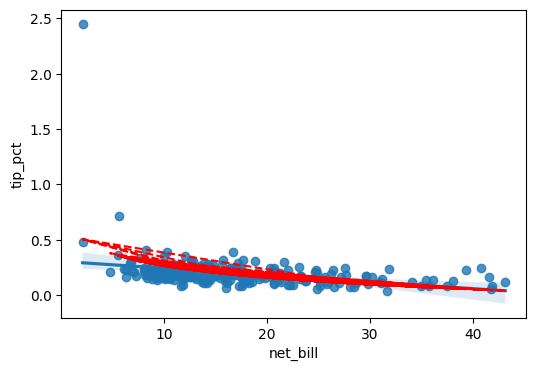

In [22]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

In [24]:
# calcula o R² para o modelo direto em tip_pct
r_squared_tip_pct = reg.rsquared
print(f"R² (log do net_bill em relação ao tip_pct): {r_squared_tip_pct}")

# calcula o R² para tip_pct diretamente (sem o log)
reg_direct = smf.ols('tip_pct ~ net_bill', data=tips).fit()
r_squared_direct = reg_direct.rsquared
print(f"R² (tip_pct diretamente em relação a net_bill): {r_squared_direct}")

R² (log do net_bill em relação ao tip_pct): 0.20148159209375027
R² (tip_pct diretamente em relação a net_bill): 0.09129084920662933


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     100.5
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           5.28e-20
Time:                        22:00:43   Log-Likelihood:                -96.372
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

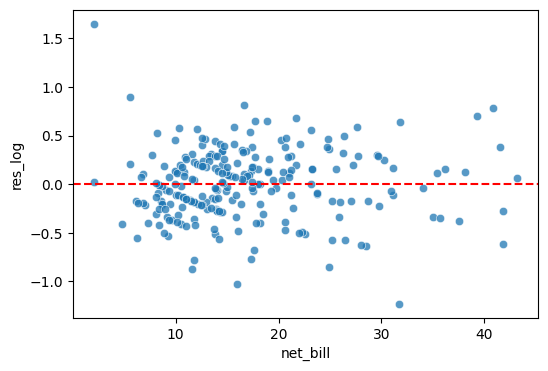

In [27]:
reg_log = smf.ols('np.log(tip_pct) ~ np.log(net_bill + 0.01)', data=tips).fit()
print(reg_log.summary())

# Adiciona os resíduos ao dataframe
tips['res_log'] = reg_log.resid
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

C:\Users\earap\AppData\Local\Temp\ipykernel_5260\3669307106.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


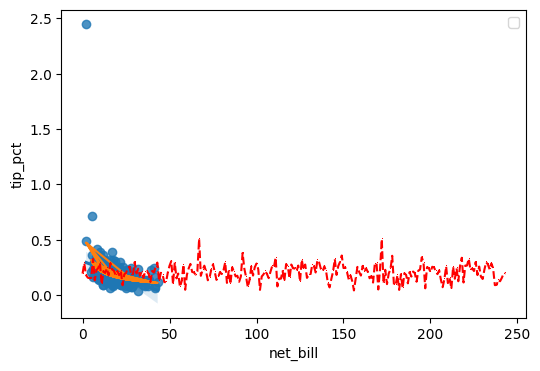

In [30]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], np.exp(reg_log.fittedvalues), reg.fittedvalues, 'r,--')

In [31]:
# calcula o R² para o modelo em log(tip_pct)
r_squared_log_tip_pct = reg_log.rsquared
print(f"R² (log(tip_pct) ~ log(net_bill)): {r_squared_log_tip_pct}")

# calcula o R² para tip_pct diretamente (sem o log)
reg_direct_tip_pct = smf.ols('tip_pct ~ np.log(net_bill + 0.01)', data=tips).fit()
r_squared_direct_tip_pct = reg_direct_tip_pct.rsquared
print(f"R² (tip_pct ~ log(net_bill)): {r_squared_direct_tip_pct}")

R² (log(tip_pct) ~ log(net_bill)): 0.2933849585448556
R² (tip_pct ~ log(net_bill)): 0.20148159209375027


###  6. qual modelo resultou no melhor ajuste?

O modelo:

 "5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```."

 Resultou em melhor ajuste. Dentro das duas variáveis, o resultado de ``(log(tip_pct) ~ log(net_bill))`` foi superior, sugerindo um aumento percentual da gorjetam em relação proporcional ao aumento percentual na conta.

###  7. Extra: modelo log-log

                              OLS Regression Results                              
Dep. Variable:     np.log(tip_pct + 0.01)   R-squared:                       0.295
Model:                                OLS   Adj. R-squared:                  0.292
Method:                     Least Squares   F-statistic:                     101.1
Date:                    Wed, 25 Sep 2024   Prob (F-statistic):           4.23e-20
Time:                            22:10:13   Log-Likelihood:                -81.955
No. Observations:                     244   AIC:                             167.9
Df Residuals:                         242   BIC:                             174.9
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

Text(0.5, 1.0, 'Resíduos do modelo log-log')

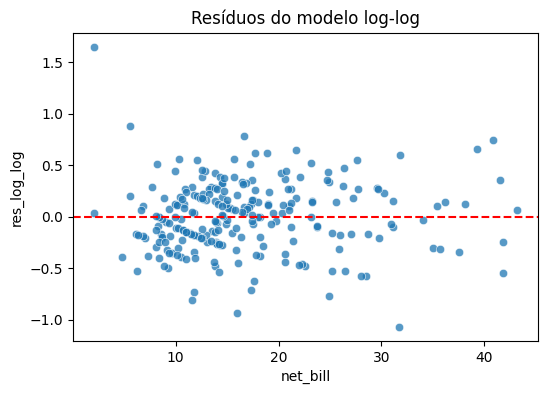

In [38]:
# ajuste do modelo log-log: log(tip_pct) ~ log(net_bill)
reg_log_log = smf.ols('np.log(tip_pct+ 0.01) ~ np.log(net_bill + 0.01)', data=tips).fit()

# exibe o resumo da regressão
print(reg_log_log.summary())

# calcula o R² para o modelo log-log
r_squared_log_log = reg_log_log.rsquared
print(f"R² (log(tip_pct) ~ log(net_bill)): {r_squared_log_log}")

# adiciona os resíduos ao dataframe
tips['res_log_log'] = reg_log_log.resid

# olota os resíduos
sns.scatterplot(x='net_bill', y='res_log_log', data=tips, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos do modelo log-log')

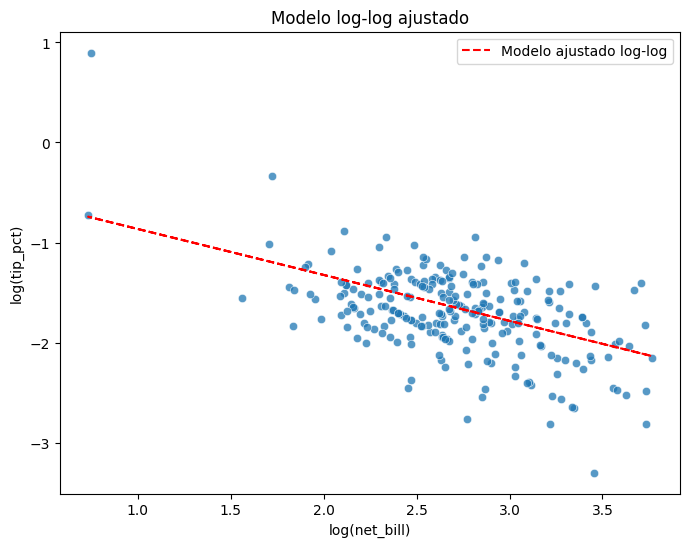

In [39]:
# plota a relação entre log(net_bill) e log(tip_pct) com o ajuste do modelo
plt.figure(figsize=(8,6))
sns.scatterplot(x=np.log(tips['net_bill'] + 0.01), y=np.log(tips['tip_pct']), alpha=0.75)
plt.plot(np.log(tips['net_bill'] + 0.01), reg_log_log.fittedvalues, 'r--', label='Modelo ajustado log-log')
plt.title('Modelo log-log ajustado')
plt.xlabel('log(net_bill)')
plt.ylabel('log(tip_pct)')
plt.legend()

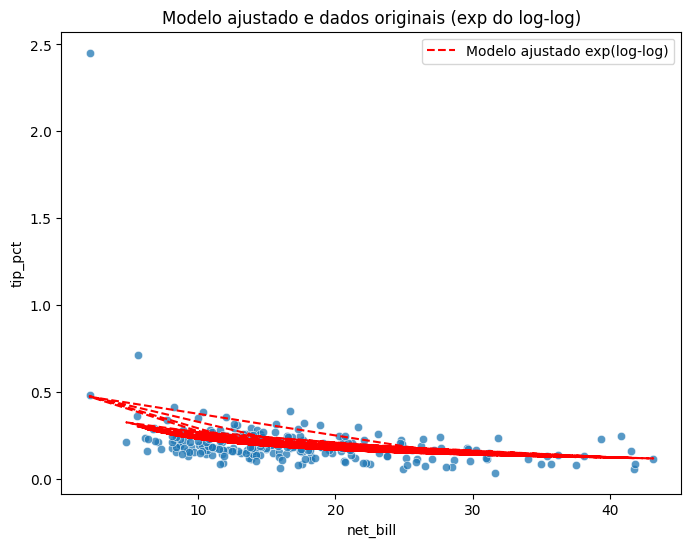

In [40]:
# plot da relação original entre net_bill e tip_pct (exp do modelo)
plt.figure(figsize=(8,6))
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=0.75)
plt.plot(tips['net_bill'], np.exp(reg_log_log.fittedvalues), 'r--', label='Modelo ajustado exp(log-log)')
plt.title('Modelo ajustado e dados originais (exp do log-log)')
plt.xlabel('net_bill')
plt.ylabel('tip_pct')
plt.legend()